# Solow model with Human Capital

Imports and set magics:

In [110]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

# Analysis of the Solow Model with Human Capital

The Solow model is a foundational economic model that elucidates long-term economic growth dynamics. This version of the classical Solow model is with human capital incorporated and with an extension where savings in human capital increases from production.

## Purpose

The Solow model with human capital integration aims to dissect the multifaceted relationship between capital accumulation, labor force growth, and advancements in technology. By including human capital, we extend the model's capacity to simulate more realistic scenarios where education and skill development play crucial roles.

## Model Equations

The extended Solow model is described by the following equations, incorporating both physical and human capital:

$$
Y_t = K_t^\alpha H_t^\phi (A_t L_t)^{1-\alpha-\phi}, \quad 0 < \alpha, \phi < 1
$$

where:
- \(Y_t\) is the total output at time \(t\),
- \(K_t\) represents physical capital,
- \(H_t\) denotes human capital,
- \(A_t\) is the level of technology,
- \(L_t\) is the labor force,
- $\alpha$ and $\phi$ are the output elasticities of physical and human capital, respectively.

### Growth Dynamics

Labor and technology evolve as follows:
$$
L_{t+1} = (1 + n) L_t, \quad L_0 \text{ given}
$$
$$
A_{t+1} = (1 + g) A_t, \quad A_0 \text{ given}
$$

### Capital Accumulations

The accumulation equations for physical and human capital are:
$$
K_{t+1} = s_K Y_t + (1 - \delta) K_t, \quad K_0 \text{ given}
$$
$$
H_{t+1} = s_H Y_t + (1 - \delta) H_t, \quad H_0 \text{ given}
$$

### Extended version
In our extended version we have that 
$$sH_t = sH_{t-1} + 0,00015 * \tilde{y}_{t-1}$$

### Transition Equations Using Tilde Variables

Utilizing tilde variables, which represent per effective worker values $\tilde{k} = \frac{K_t}{A_t L_t}$, we transform the accumulation equations:

$$
\tilde{k}_{t+1} = \frac{s_K \tilde{y}_t + (1 - \delta) \tilde{k}_t}{(1 + n)(1 + g)}
$$
$$
\tilde{h}_{t+1} = \frac{s_H \tilde{y}_t + (1 - \delta) \tilde{h}_t}{(1 + n)(1 + g)}
$$

These tilde variables help analyze the model's behavior in a normalized manner, facilitating the understanding of growth trajectories and steady state conditions.

## Steady State Analysis

We derive the steady state values by setting the change in tilde variables across periods to zero, leading to a system of equations:
$$
0 = \frac{s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng) \tilde{k}_t}{(1 + n)(1 + g)}
$$
$$
0 = \frac{s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng) \tilde{h}_t}{(1 + n)(1 + g)}
$$

Solving these equations provides insights into the model's long-term equilibrium states under different parameter settings and growth mechanisms.

## Model Simulation and Results

In this project we initialize the model with specified parameters, simulate its progression, and visualize the trajectories of $\tilde{k}_t$ and $\tilde{h}_t$ towards their steady states.


## Numerical solution

To solve our model for Steady state values, we use two different methods. First, we simulate the evolution of the model over time, and then loop until we find the steady state results. The result of this method is shown below

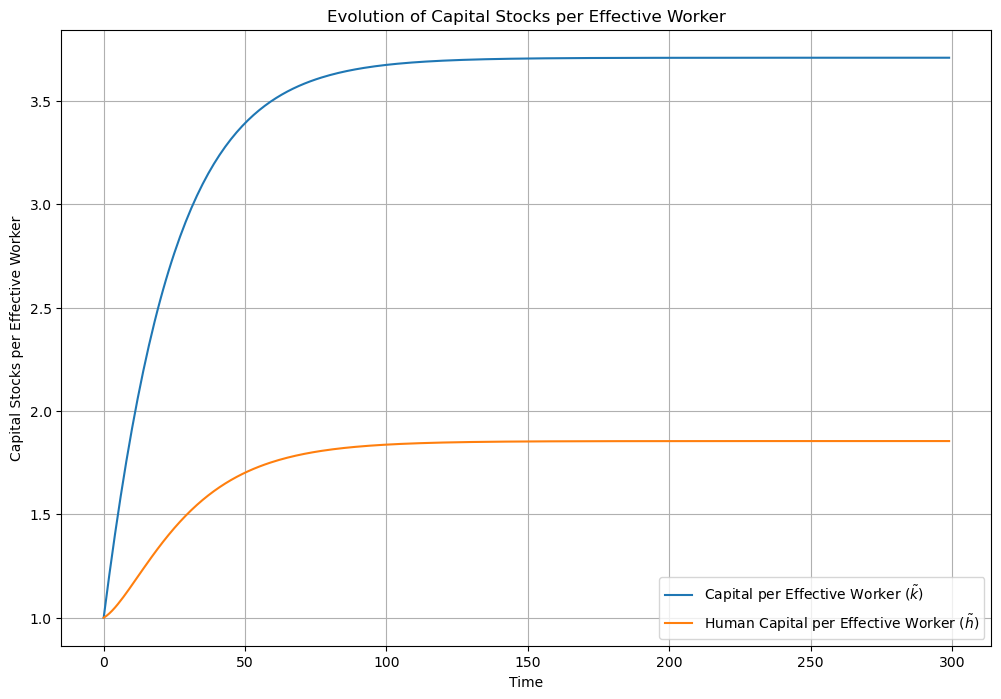

Steady State:
k_tilde: 3.7095, h_tilde: 1.8547 


In [111]:
# Import the model
from modelproject import SolowModelHumanCapital
# Initialize and simulate the base model
base_model = SolowModelHumanCapital()
base_model.plot_tilde_variables()

# Print the steady state values for the base model
print("Steady State:")
print(f"k_tilde: {base_model.K_tilde[-1]:.4f}, h_tilde: {base_model.H_tilde[-1]:.4f} ")



Hereafter, we use another numerical solution, where we use scipy's fsolve function, to calculate the steady state in our model. As seen below, the results are almost identical.

In [112]:
# Import the model
from modelproject import SolowModelHumanCapital
# Initialize and solve model using fsolve
base_model = SolowModelHumanCapital()

k_tilde_ss, h_tilde_ss = base_model.steady_state()
y_tilde_ss = k_tilde_ss**base_model.params['alpha'] * h_tilde_ss**base_model.params['phi']
# Print the steady state values for the base model
print("Steady State:")
print(f"k_tilde: {k_tilde_ss}, h_tilde: {h_tilde_ss} and therefore y_tilde: {y_tilde_ss}")

Steady State:
k_tilde: 3.709463756241649, h_tilde: 1.8547318781208244 and therefore y_tilde: 1.676677617821231


# Further analysis

To visualise how the different parameters impact our model, we have created a plot with interactive widgets, that shows how k_tilde and h_tilde is impacted by each parameter. 

In [113]:
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display
from modelproject import SolowModelHumanCapital

# Initialize the model
model = SolowModelHumanCapital()

# Define a function to update the plot based on the slider
def update_model(alpha, phi, g, n, s_K, s_H, delta):
    model.update_params(alpha=alpha, phi=phi, g=g, n=n, s_K=s_K, s_H=s_H, delta=delta)
    model.plot_tilde_variables()

# Create sliders for parameters
alpha_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.9, step=0.05, description='Alpha')
phi_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.9, step=0.05, description='Phi')
g_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='g')
n_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='n')
s_K_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.05, description='s_K')
s_H_slider = widgets.FloatSlider(value=0.1, min=0.05, max=0.5, step=0.05, description='s_H')
delta_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Delta')

# Display sliders and bind the update function
ui = widgets.VBox([alpha_slider, phi_slider, g_slider, n_slider, s_K_slider, s_H_slider, delta_slider])
out = widgets.interactive_output(update_model, {'alpha': alpha_slider, 'phi': phi_slider, 'g': g_slider, 'n': n_slider, 's_K': s_K_slider, 's_H': s_H_slider, 'delta': delta_slider})
display(ui, out)

Output()

## Extension

As an extention to the Solow model, we have made a version, where the savings in human capital will increase by 0,00015 * $\tilde{y}_{t-1}$ every year. This will change the steady state value of both k_tilde and h_tilde

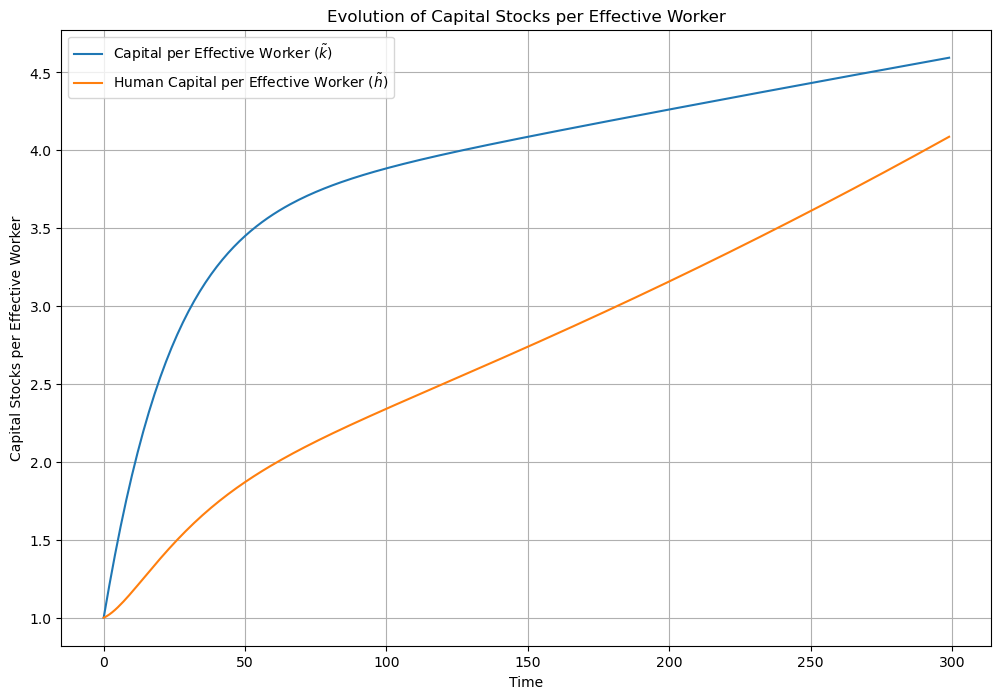

Extension Model Steady State (Increased savings in human capital):
k_tilde: 4.5948, h_tilde: 4.0876


In [114]:
# Import the updated model
from modelproject import SolowModelHumanCapital

# Initialize and simulate the extension model with endogenous growth
extension_model = SolowModelHumanCapital(Increase_saving=True)
extension_model.plot_tilde_variables()

# Print the steady state values for the extension model
print("Extension Model Steady State (Increased savings in human capital):")
print(f"k_tilde: {extension_model.K_tilde[-1]:.4f}, h_tilde: {extension_model.H_tilde[-1]:.4f}")


As seen, the steady state value of k_tilde and h_tilde is higher, and there is especially a big change in h_tilde, which increases from 1,85 to 4,0876

# Conclusion

By the solution of the base model and the extension we can see that, when theres increased savings in human capital, the SS values of effective worker variables (tilde variables) increases. This has a stronger effect on h_tilde, but it also impacts k_tilde.  